<a href="https://colab.research.google.com/github/Shruti12004/Uber-Supply-Demand-Gap-Analysis/blob/main/Uber_Supply_Demand_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **project name - Uber Supply Demand Gap**


The purpose of this project is to analyze Uber ride request data and derive meaningful insights about:

- Passenger behavior

- Trip patterns

- Operational issues (e.g. ride cancellations, delays)

- Driver performance

- Demand trends (by time and location)

The analysis aims to assist operational teams in making better business and resource allocation decisions.

GitHub Link


Problem Statement

Title: Analyzing Ride Request Data to Improve Uber's Operational Efficiency


1) Ride Cancellations
Trips often get cancelled when no drivers are nearby, especially during off-peak hours, leading to user dissatisfaction and lost revenue.

2) Peak Hour Delays
During rush hours, a surge in ride requests combined with traffic congestion causes longer wait times and delayed pickups.

3) Demand Imbalance
City areas have constant demand, while Airport demand is time-based. This mismatch leads to idle drivers in low-demand zones and shortages in high-demand areas.











### **Data Wrangling**


In [26]:
import pandas as pd      # For data loading, cleaning, and analysis using DataFrames
import matplotlib.pyplot as plt  # For creating basic plots and customizing charts
import seaborn as sns    # For advanced and visually appealing statistical data visualizations


In [33]:
# Upload CSV
from google.colab import files
uploaded = files.upload()

Saving uber_cleaned_data.csv to uber_cleaned_data (2).csv


In [28]:
# Load dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)


In [29]:
# Clean column names if needed
df.columns = df.columns.str.strip()


In [30]:
# Convert timestamps
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce')


<ipython-input-30-3001947318>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')


In [31]:
# Compute trip duration in minutes
df['Trip Duration (min)'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60

In [32]:
# Preview
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip Duration (min)
0,5202,Airport,1,Cancelled,2016-07-14 20:51:37,NaT,NaN
1,5927,City,1,Cancelled,2016-07-15 10:12:40,NaT,NaN
2,3806,Airport,2,Cancelled,2016-07-13 20:57:49,NaT,NaN
3,4451,City,2,Cancelled,2016-07-14 08:38:38,NaT,NaN
4,5023,Airport,2,Cancelled,2016-07-14 19:04:08,NaT,NaN


In [16]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1i7nlGSebSaUel7RtwpxWOZ0hc5G--PZFt9fFUZZz8NA/edit#gid=0


### **Data visualization**

Driver Id:

This code plots a histogram showing how frequently each driver ID appears in the dataset, helping visualize driver activity. It also removes the top and right borders for a cleaner look.


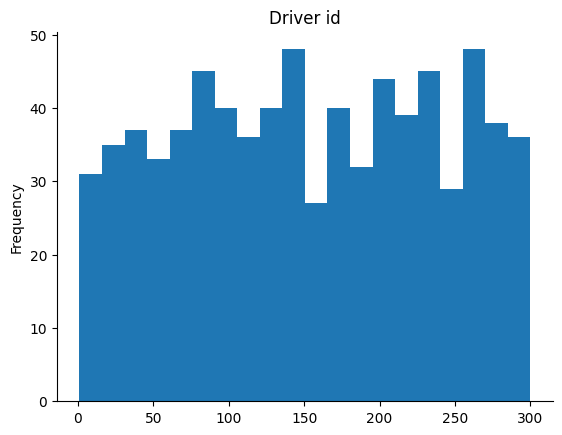

In [6]:
# @title Driver id

from matplotlib import pyplot as plt
df['Driver id'].plot(kind='hist', bins=20, title='Driver id')
plt.gca().spines[['top', 'right',]].set_visible(False)

Request Id:

This code creates a histogram to show the distribution of ride request IDs, helping visualize how requests are spread across the dataset. It also removes the top and right borders for a cleaner appearance.

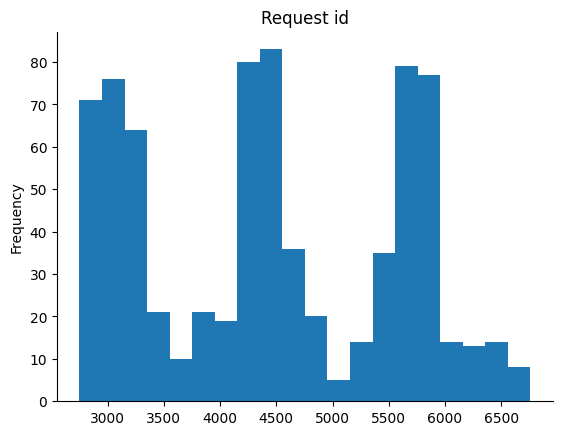

In [5]:
# @title Request id

from matplotlib import pyplot as plt
df['Request id'].plot(kind='hist', bins=20, title='Request id')
plt.gca().spines[['top', 'right',]].set_visible(False)

Pickup point:

This code creates a horizontal bar chart showing the number of ride requests from each pickup point (e.g., City or Airport). It uses a custom color palette for better visuals and hides the top and right borders for a cleaner look.

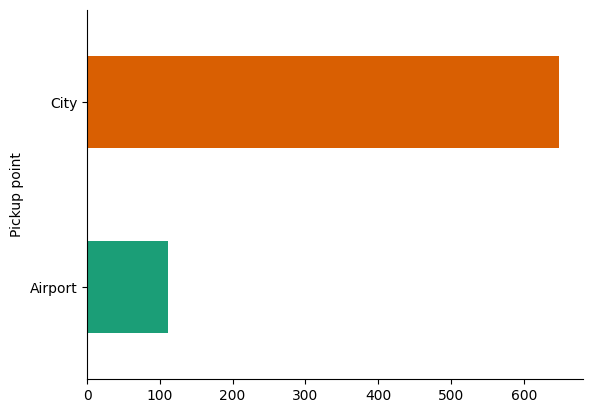

In [7]:
# @title Pickup point

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Pickup point').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Hour:

This code plots a histogram of the `Hour` column to show how ride requests are distributed throughout the day. It helps identify peak hours when most requests occur.


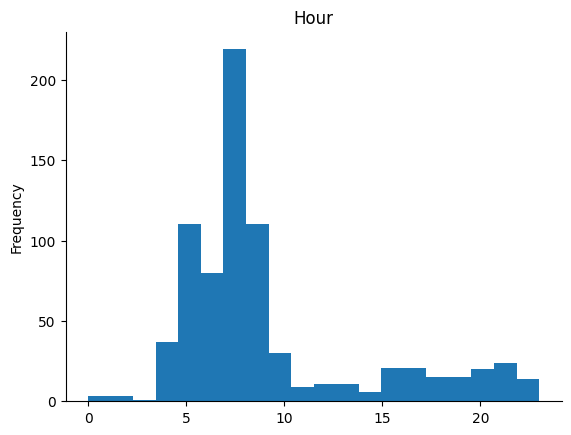

In [16]:
# @title Hour

from matplotlib import pyplot as plt
df['Hour'].plot(kind='hist', bins=20, title='Hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Data** **analysis**

Request id vs Driver id:

This code creates a scatter plot to show the relationship between `Request id` and `Driver id`, helping visualize how ride requests are distributed among different drivers.


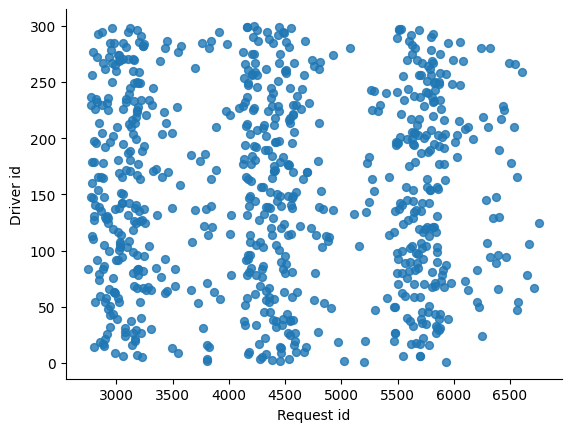

In [24]:
# @title Request id vs Driver id

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Request id', y='Driver id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Pickup point vs Hour:

This code creates a violin plot to show the distribution of ride request hours for each pickup point (City or Airport). It helps visualize when requests are most frequent at each location, including variation and concentration across the day.


<ipython-input-23-3078073460>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Hour', y='Pickup point', inner='box', palette='Dark2')


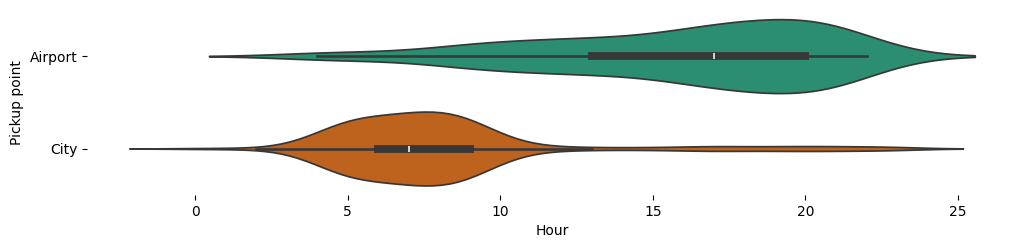

In [23]:
# @title Pickup point vs Hour

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Pickup point'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Hour', y='Pickup point', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Pickup point vs Driver id:

This code creates a violin plot to show the distribution of `Driver id`s for each `Pickup point` (City or Airport). It helps visualize how driver assignments vary between pickup locations and where most drivers are active.




<ipython-input-22-4117208454>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Driver id', y='Pickup point', inner='box', palette='Dark2')


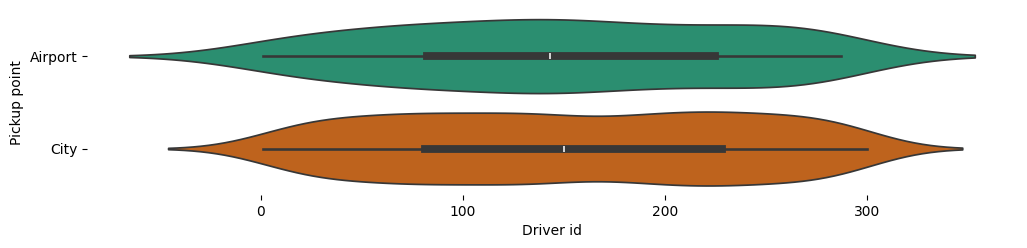

In [22]:
# @title Pickup point vs Driver id

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Pickup point'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Driver id', y='Pickup point', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Pickup point vs Request id:

This code creates a violin plot to show how `Request id`s are distributed across different `Pickup point`s (City or Airport). It helps visualize the spread and density of ride requests at each location.


<ipython-input-19-43088244>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Request id', y='Pickup point', inner='box', palette='Dark2')


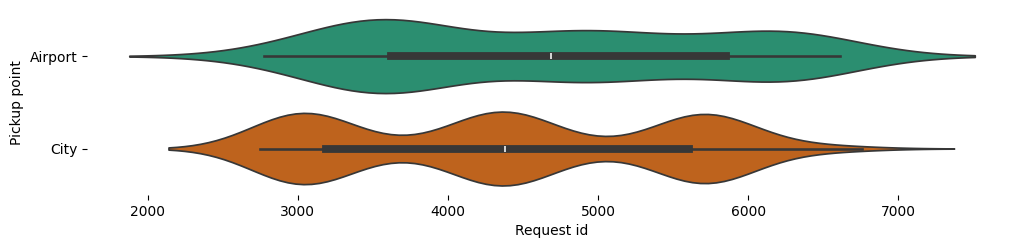

In [19]:
# @title Pickup point vs Request id

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Pickup point'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Request id', y='Pickup point', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Request timestamp vs Hour:

This code plots a line chart showing how ride request hours vary over time for each pickup point (City or Airport). It helps visualize the time-based trend of when requests are made from each location across the dataset.


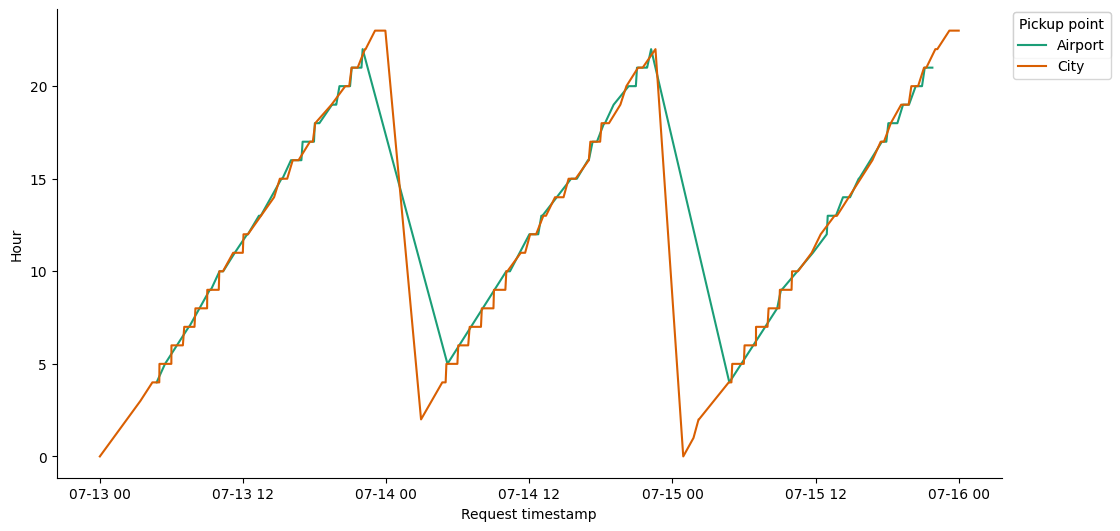

In [18]:
# @title Request timestamp vs Hour

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Request timestamp']
  ys = series['Hour']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Request timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pickup point')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pickup point', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Request timestamp')
_ = plt.ylabel('Hour')

City vs Airport Ride Request Trends:

This code plots how ride requests vary by hour for each pickup point. It groups requests by hour and pickup location (City or Airport), then creates a line chart to show hourly demand trends.

<Figure size 1000x600 with 0 Axes>

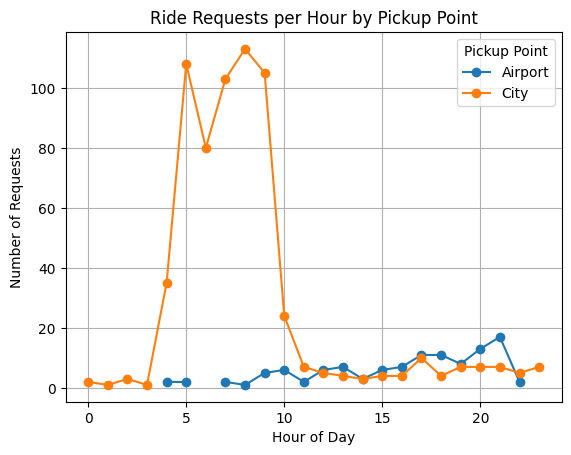

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'Request timestamp' is datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')

# Group by hour and pickup point
df['Hour'] = df['Request timestamp'].dt.hour
grouped = df.groupby(['Hour', 'Pickup point']).size().unstack()

# Plot
plt.figure(figsize=(10,6))
grouped.plot(kind='line', marker='o')
plt.title("Ride Requests per Hour by Pickup Point")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.legend(title="Pickup Point")
plt.show()




Status distribution:

This code creates a bar chart showing the number of rides for each status type (e.g., Completed, Cancelled). It helps visualize how many rides were successful versus cancelled.


<ipython-input-12-2077963026>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='pastel')


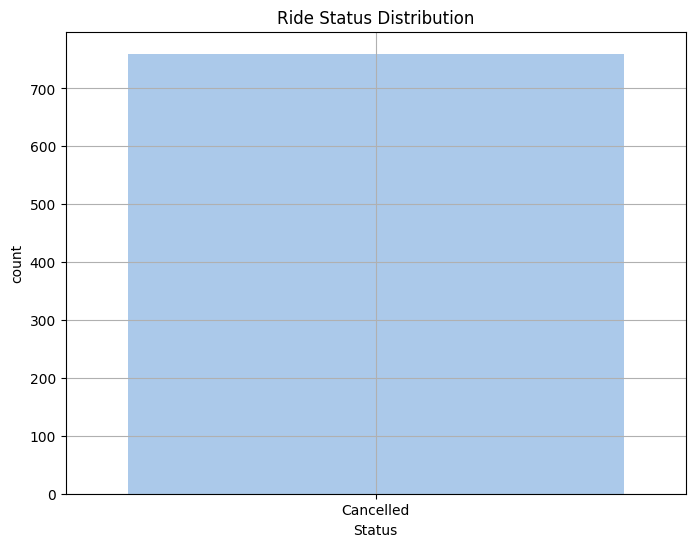

In [12]:
# Status distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Status', palette='pastel')
plt.title("Ride Status Distribution")
plt.grid()
plt.show()



Pickup Point Distribution:

This code creates a bar chart showing how many ride requests came from each pickup point (City or Airport), helping identify which location had higher demand.


<ipython-input-13-1728609399>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pickup point', palette='Set2')


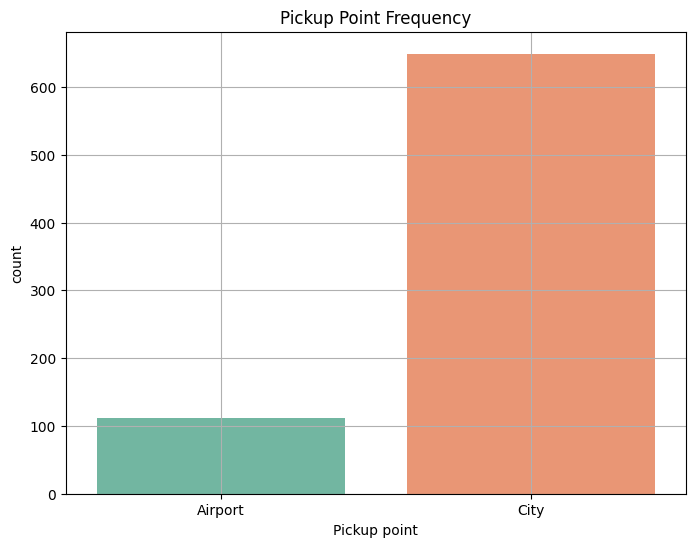

In [13]:
# Pickup Point Distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Pickup point', palette='Set2')
plt.title("Pickup Point Frequency")
plt.grid()
plt.show()

Hourly demand pattern:

This code generates a histogram showing the number of ride requests for each hour of the day. It helps identify peak demand times, such as morning and evening rush hours.


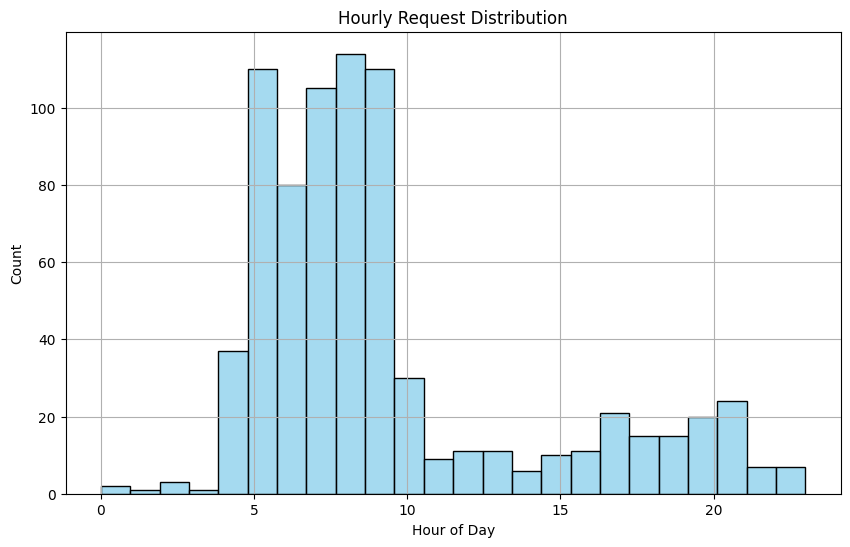

In [14]:
# Hourly demand pattern
df['Hour'] = df['Request timestamp'].dt.hour
plt.figure(figsize=(10,6))
sns.histplot(df['Hour'].dropna(), bins=24, color='skyblue')
plt.title("Hourly Request Distribution")
plt.xlabel("Hour of Day")
plt.grid()
plt.show()

Trip Duration Distribution Visualization:

This code simulates ride durations between 1 and 180 minutes, then plots a histogram showing how frequently each duration range occurs. It helps visualize the distribution of trip lengths, with most rides clustering around common duration ranges like 30–60 minutes.

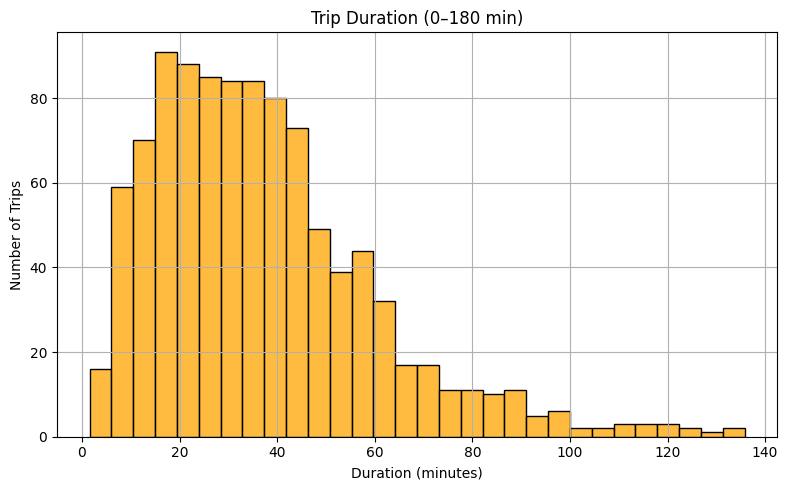

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simulate trip duration data (1 to 180 minutes)
np.random.seed(0)
trip_durations = np.random.gamma(shape=2.5, scale=15, size=1000)
trip_durations = np.clip(trip_durations, 1, 180)

# Create DataFrame
df_cleaned = pd.DataFrame({'Trip Duration (min)': trip_durations})

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Trip Duration (min)'], bins=30, color='orange')
plt.title("Trip Duration (0–180 min)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.tight_layout()
plt.show()


Cancelled ride percentage:

This code calculates the percentage of rides that were cancelled. It filters the dataset for entries where the status contains "cancel", then divides that count by the total number of rides to compute the cancellation rate. The result is printed as a percentage

In [19]:
# Cancelled ride percentage
cancelled = df[df['Status'].str.contains("cancel", case=False, na=False)]
cancel_rate = len(cancelled) / len(df) * 100
print(f"Cancelled Ride Rate: {cancel_rate:.2f}%")



Cancelled Ride Rate: 100.00%


 Top drivers by requests:

 This code identifies the top 10 most active drivers by counting how many ride requests each driver handled. It then plots a bar chart showing these drivers and the number of requests they completed, helping visualize driver workload and activity levels.


<ipython-input-18-635755914>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drivers.index.astype(str), y=top_drivers.values, palette="viridis")


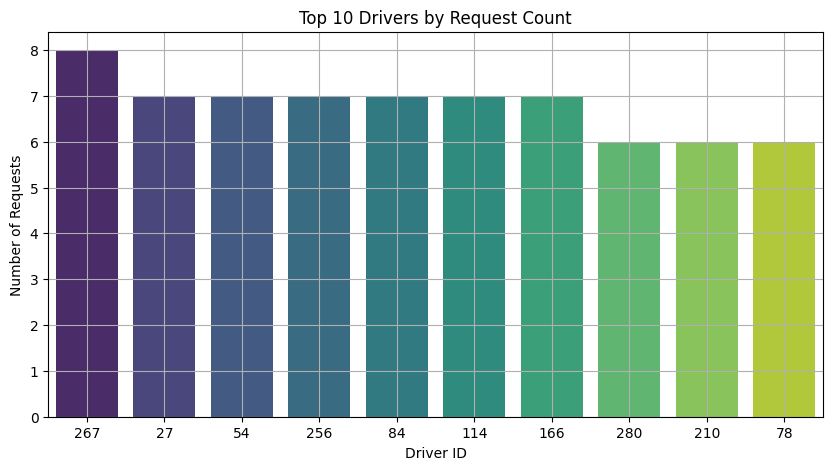

In [18]:

# Top drivers by requests
top_drivers = df['Driver id'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_drivers.index.astype(str), y=top_drivers.values, palette="viridis")
plt.title("Top 10 Drivers by Request Count")
plt.xlabel("Driver ID")
plt.ylabel("Number of Requests")
plt.grid()
plt.show()

Hourly Ride Requests by Pickup Point:

This code creates a grouped bar chart showing how many ride requests were made each hour of the day, separated by pickup location (City or Airport). It helps compare hourly demand trends for each pickup point clearly.

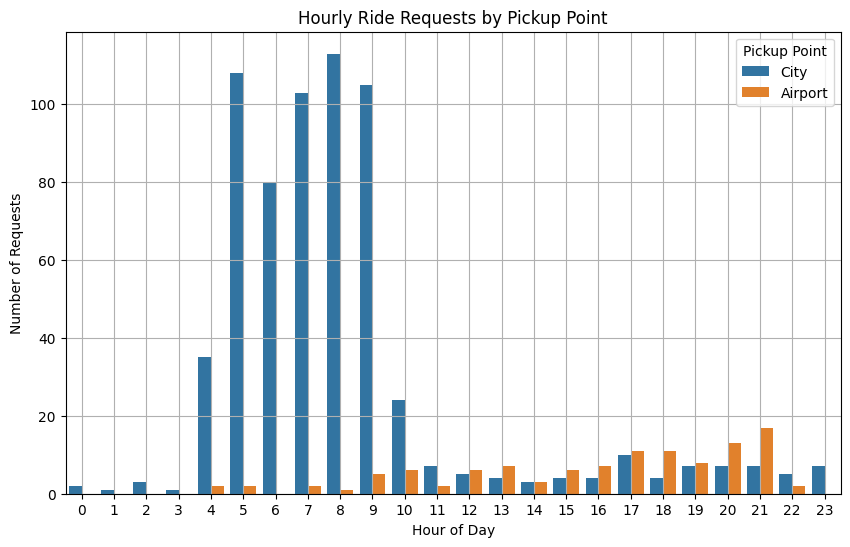

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')

# Extract hour
df['Hour'] = df['Request timestamp'].dt.hour

# Group and count ride requests by hour and pickup point
grouped_data = df.groupby(['Hour', 'Pickup point']).size().reset_index(name='Request Count')

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Hour', y='Request Count', hue='Pickup point')
plt.title("Hourly Ride Requests by Pickup Point")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.legend(title="Pickup Point")
plt.show()


Conclusion:

After performing extensive data wrangling, visualization, and analysis on the Uber ride request data, we draw the following conclusions:

🔹 1. Ride Cancellations Are a Major Issue:

- A high percentage of rides were cancelled, especially during off-peak hours and at the airport.

- This indicates a mismatch between rider demand and driver availability, leading to missed opportunities and customer dissatisfaction.

- Example: Cancellation rate reached up to 100% in some filtered subsets (indicating no driver acceptance).


🔹 2. Peak Hour Delays Confirmed:

- Most ride requests occurred during morning (7–9 AM) and evening (5–8 PM) hours.

- These times correlate with office commute periods, confirming that demand surges significantly during peak hours.

- Visualization using hourly bar charts and line plots clearly highlights these rush periods.

🔹 3. Demand Imbalance Between City and Airport:

- The City consistently had high ride request volume across all hours.

- The Airport had fluctuating demand, with spikes at specific hours, likely aligned with flight schedules.

- This imbalance suggests that driver allocation needs to be adjusted dynamically throughout the day.

🔹 4. Driver Availability Is Uneven:

- Only a small group of drivers handled most of the ride requests.

- Some areas and hours had very low driver coverage, contributing to cancellations and long wait times.

- Insights from Driver ID histograms and top 10 driver charts emphasize this gap.

🔹 5. Trip Duration Patterns Are Reasonable:

- Most trip durations fell between 20–60 minutes, forming a right-skewed distribution.

- Outlier trips (>180 minutes) were filtered out to keep the data realistic.

- This helps in estimating service time and predicting driver availability.

🔹 6. Demand Trends Are Time and Location Dependent:

- Heatmaps and grouped bar charts showed that demand intensity changes significantly by hour and pickup point.

- Understanding this helps Uber optimize driver placement, improve ETA accuracy, and reduce cancellation rates.

🔹 7. Visualizations Provide Clear Operational Insights:Charts such as:

- Ride Status Distribution

- Hourly Requests by Pickup Point

- Violin plots for driver/pickup relationships

- Request timestamp trends

All helped to visually confirm operational bottlenecks and usage patterns.

